# Project: Wrangling and Analyzing Data from WeRateDogs

By: Egwuda Ojonugwa Everest

## Table of Contents
<ul>
<li><a href="#Data Gathering">Data Gathering</a></li>
<li><a href="#Assessing Data">Assessing Data</a></li>
<li><a href="#Cleaning Data">Cleaning Data</a></li>
<li><a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>
</ul>

In [420]:
#importing the necessary modules
import pandas as pd
import numpy as np
import requests
import tweepy
import configparser
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import seaborn as sns

## *Data Gathering*

We will gather all three pieces of data for this project in the cells below and load them in the notebook. The methods required to gather each data are different.

        1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [421]:
rating_DF=pd.read_csv("twitter_archive_enhanced.csv")
#ratingDogsDF[ratingDogsDF.pupper!="None"]

In [422]:
rating_DF=pd.read_csv("twitter_archive_enhanced.csv")
#ratingDogsDF[ratingDogsDF.pupper!="None"]

        2.Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [423]:
imageTSV=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'w') as file: 
    file.write(imageTSV.text)

In [424]:
image_predict=pd.read_csv('image_predictions.tsv', sep='\t')

In [425]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


        3.Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [426]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

In [ ]:
#Twitter API data code
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [427]:
# read tweet-json.txt into a DataFrame
tweet_df = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_df.append({'retweet_count' : retweet_count , 'favorite_count': favorite_count, 'tweet_id': tweet_id})
        
tweet_data = pd.DataFrame(tweet_df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [428]:
#check the first 3 rows
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

In this section, we will detect and document at least eight (8) quality issues and two tidiness issues.

In [429]:
##checking to see if there are any duplicated tweets
rating_DF.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [430]:
#Check for denominator
rating_DF[rating_DF.rating_denominator.isna()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [431]:
rating_DF.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The minimum and maximum values for the ratings numerator and denominator from the above is not correct.

In [432]:
#checking if the syntax for the urls are consistent
image_predict.jpg_url[image_predict.jpg_url.str.endswith('.jpg')==False]

320    https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815    https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
Name: jpg_url, dtype: object

In [433]:
rating_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The timestamp column datatype is an object instead of a date data type

The tweet_id column is an integer instead of a string

In [434]:
rating_DF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [435]:
rating_DF.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

From the above, we can see we have some invalid Dog names

In [436]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [437]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [438]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The 'img_num' column has 4 as it's maximum value
Incorrect minimum and maximum values in the 'p2_conf' and 'p3_conf' columns as prediction % can't go beyond 100

In [439]:
image_predict.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [440]:
image_predict.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [441]:
image_predict.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [442]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [443]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [444]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Data Quality Issues

    1. retweeted_status.timestamp and timestamp in ratingDF are objects
    
    2. The rating_numerator and rating_denominator columns in ratingDF should be a float.
    
    3. Some of the names in ratingDF are inaccurate and can't be names.
    
    4. retweets and replies in ratingDF are not necessary
    
    5. Some of the jpg_urls in image_predict are incomplete (endswith (...))
    
    6. The remaining IDs should all be qualitative
    
    7. favourite and retweet count shouldn't be a float
    
    8. Source column is overpopulated with irrelevant information, making it difficult for us to tell the source.
    
    9. The rating numerator and denominator column was extracted well, with some ratings as decimals
    
    
## Data Tidyness Issues

    1. Merge data frames on shared tweet_ids
    
    2. doggo, floofer, pupper and puppo columns should be values instead of variables

## Data Cleaning

In this section, we will clean all the issues documented while assessing.

In [445]:
# Make a copy of the three datasets
dogsR = rating_DF.copy()
img = image_predict.copy()
td = tweet_data.copy()

## Issue #1 retweeted_status.timestamp and timestamp in ratingDF are objects

Define:  They ought to be timestamps

#### *Code*

In [446]:
#change the dtype from object to timestamp
dogsR.timestamp = pd.to_datetime(dogsR.timestamp, infer_datetime_format=True)
dogsR.retweeted_status_timestamp = pd.to_datetime(dogsR.retweeted_status_timestamp, infer_datetime_format=True)

#### *Test*

In [447]:
dogsR.timestamp.dtypes, dogsR.retweeted_status_timestamp.dtypes

(dtype('<M8[ns]'), dtype('<M8[ns]'))

## Issue #2 The rating_numerator and rating_denominator columns in ratingDF should be a float.

Define: Change values to a float

#### *Code*

In [448]:
#Change the values to float
dogsR.rating_numerator = dogsR.rating_numerator.astype(float)
dogsR.rating_denominator = dogsR.rating_denominator.astype(float)

#### *Test*

In [449]:
dogsR.rating_numerator.dtypes, dogsR.rating_denominator.dtypes

(dtype('float64'), dtype('float64'))

## Issue #3 Some of the names in ratingDF are inaccurate and can't be names.

Define: Replace values where text is not a name

#### *Code*

In [450]:
inaccurate_names=["", 'a','an','the', 'very', 'unacceptable', 'this', 'such', 'quite', 'one', 'old', 'officially', 'not', 'my', 'mad', 'light', 'life', 'just', 'space', 'infuriating', 'incredible', 'incredibly', 'his', 'getting', 'by', 'all', 'actually']
dogsR.name.replace(inaccurate_names, None, inplace=True)

In [451]:
dogsR.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

#### *Test*

In [452]:
list(dict(dogsR.name.value_counts()))[:50]

['None',
 'Oliver',
 'Charlie',
 'Cooper',
 'Lucy',
 'Lola',
 'Tucker',
 'Penny',
 'Bo',
 'Winston',
 'Sadie',
 'Daisy',
 'Toby',
 'Bailey',
 'Stanley',
 'Buddy',
 'Dave',
 'Bentley',
 'Jax',
 'Oscar',
 'Leo',
 'Koda',
 'Rusty',
 'Walter',
 'Scout',
 'Bella',
 'Jack',
 'Louis',
 'Milo',
 'Gus',
 'Phil',
 'Larry',
 'Sammy',
 'Finn',
 'Chester',
 'Alfie',
 'Sunny',
 'George',
 'Jeffrey',
 'Oakley',
 'Derek',
 'Ted',
 'Riley',
 'Duke',
 'Scooter',
 'Jerry',
 'Reginald',
 'Ruby',
 'Loki',
 'Rory']

# ISSUE #4 doggo, floofer, pupper and puppo columns should BE values not variables.

Define
unpivot the dataframe from wide to long in order to make more sense of the data and have an observation in each row instead of a column header.

#### *Code*

In [453]:
def i(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'not_known'
    else:
        val ='None'
    return val
# creating the new column and calling the function to apply
dogsR['not_known'] = dogsR.apply(i, axis=1)

In [454]:
dogsR = pd.melt(dogsR, id_vars =['tweet_id','in_reply_to_status_id',
                       'in_reply_to_user_id','timestamp','source','text','retweeted_status_id',
                       'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
                        'rating_numerator','rating_denominator', 'name'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'not_known'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

In [455]:
dogsR = dogsR[dogsR['value']!= 'None']

In [456]:
dogsR = dogsR.drop('value', axis=1)

#### *Test*

In [457]:
dogsR.dog_stage.value_counts()

not_known    1976
pupper        257
doggo          97
puppo          30
floofer        10
Name: dog_stage, dtype: int64

## Issue #5 retweets and replies in ratingDF are not necessary

Define: Drop unneeded columns and rows

#### *Code*

In [458]:
index_retweets = dogsR.retweeted_status_id[dogsR.retweeted_status_id.notnull()==True].index
dogsR.drop(index_retweets, inplace = True)

In [459]:
dropping_rows=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"]
dogsR.drop(dropping_rows, axis=1, inplace=True)

#### *Test*

In [460]:
dogsR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 9 to 11779
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2187 non-null   int64         
 1   timestamp           2187 non-null   datetime64[ns]
 2   source              2187 non-null   object        
 3   text                2187 non-null   object        
 4   rating_numerator    2187 non-null   float64       
 5   rating_denominator  2187 non-null   float64       
 6   name                2187 non-null   object        
 7   dog_stage           2187 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 153.8+ KB


## Issue #6 Some of the jpg_urls in image_predict are incomplete (endswith (...))

Define: Drop the rows

#### *Code*

In [461]:
#drop the url
img.jpg_url[img.jpg_url.str.endswith('.jpg')== False]

320    https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815    https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
Name: jpg_url, dtype: object

In [462]:
img.drop([320, 815], inplace=True)

#### *Test*

In [463]:
img.jpg_url[img.jpg_url.str.endswith('.jpg')== False]

Series([], Name: jpg_url, dtype: object)

## Issue #7 The remaining IDs should all be qualitative


Define: Change Dtype to str

#### *Code*

In [464]:
#Change dtype to str
dogsR.tweet_id = dogsR.tweet_id.astype(str)
img.tweet_id = img.tweet_id.astype(str)
td.tweet_id = td.tweet_id.astype(str)

#### *Test*

In [465]:
dogsR.tweet_id.dtypes, img.tweet_id.dtypes, td.tweet_id.dtypes

(dtype('O'), dtype('O'), dtype('O'))

# Issue #8 Source column is overpopulated with irrelevant information, making it difficult for us to tell the source.

#### *Define*
The 'source' column contains information regarding the source of the tweet

#### *Code*

In [466]:
# importing BeautifulSoup
from bs4 import BeautifulSoup as bs

clean_source = []

#use a for loop to iterate through each line in the source column
for line, row in dogsR.iterrows():
    soup = bs(row.source)
    # assign it to a variable
    i = soup.find('a').contents[0]
    #append it with the empty list we created earlier
    clean_source.append(i)
# add to the dataframe    
dogsR.source = clean_source

#### *Test*

In [467]:
dogsR.source.value_counts()


Twitter for iPhone     2053
Vine - Make a Scene      92
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

# Issue #9: The rating numerator and denominator column was not extracted well, with some ratings as decimals

Define:

We will change the data type of the rating nominator and denominator column from int to float before proceeding to extract the correct values using regular expression.

#### *Code*

In [468]:
dogsR.rating_numerator = dogsR.rating_numerator.astype(float)

In [469]:
dogsR.rating_numerator = dogsR.text.str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

#### *Test*

In [470]:
dogsR.rating_numerator.value_counts()

12       506
10       443
11       428
13       309
9        156
8         98
7         53
14        43
5         35
6         32
3         19
4         17
2          9
1          8
420        2
0          2
44         1
666        1
20         1
13.5       1
144        1
182        1
204        1
84         1
1776       1
11.27      1
15         1
88         1
50         1
9.5        1
9.75       1
11.26      1
80         1
121        1
99         1
007        1
165        1
45         1
143        1
24         1
960        1
60         1
17         1
Name: rating_numerator, dtype: int64

# ISSUE #10: favourite and retweet count shouldn't be a float

Define
convert to integer.

In [471]:
td.retweet_count = td.retweet_count.astype(int)

In [472]:
td.favorite_count = td.favorite_count.astype(int)

In [473]:
td

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Issue #11 Merge data frames on shared tweet_ids

#### *Define*
we will be merging the three dataframes on tweet_id.

In [474]:
twitter_archive_master = dogsR.merge(img, on='tweet_id').merge(td, on='tweet_id')

In [475]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12,10.0,None,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,...,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5669,28031
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,10.0,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628,20730
4,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,10.0,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327,16476


# Storing Data


Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [476]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# ANALYZING AND VISUALIZING DATA

In this section, analyze and visualize the wrangled data, at least three (3) insights and one (1) visualization.

In [477]:
df =pd.read_csv("twitter_archive_master.csv")

In [478]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12.0,10.0,None,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,...,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5669,28031
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12.0,10.0,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628,20730
4,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12.0,10.0,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327,16476


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2003 non-null   int64  
 1   timestamp           2003 non-null   object 
 2   source              2003 non-null   object 
 3   text                2003 non-null   object 
 4   rating_numerator    2003 non-null   float64
 5   rating_denominator  2003 non-null   float64
 6   name                2003 non-null   object 
 7   dog_stage           2003 non-null   object 
 8   jpg_url             2003 non-null   object 
 9   img_num             2003 non-null   int64  
 10  p1                  2003 non-null   object 
 11  p1_conf             2003 non-null   float64
 12  p1_dog              2003 non-null   bool   
 13  p2                  2003 non-null   object 
 14  p2_conf             2003 non-null   float64
 15  p2_dog              2003 non-null   bool   
 16  p3    

In [480]:
df.rating_numerator.value_counts().sort_index(ascending=False)

1776.00      1
420.00       1
204.00       1
165.00       1
144.00       1
143.00       1
121.00       1
99.00        1
88.00        1
84.00        1
80.00        1
60.00        1
50.00        1
45.00        1
44.00        1
24.00        1
14.00       35
13.50        1
13.00      261
12.00      455
11.27        1
11.26        1
11.00      398
10.00      420
9.75         1
9.00       151
8.00        95
7.00        52
6.00        32
5.00        33
4.00        16
3.00        19
2.00         9
1.00         5
0.00         2
Name: rating_numerator, dtype: int64

### Insight 1:

From the above plot, it can be deduced that the most frequent rating given to the dogs in this analysis is 12, with 455 tweets containing that as numerator, followed by rating 10 and 11 with 420, and 398 occcurences respectively.

In [481]:
#retweets have dog names compared to retweet total and total of tweets with dog names
((df.retweet_count/df.favorite_count)<.5).sum()/df.retweet_count.count()

0.927608587119321

### Insight 2:

From the analysis above, 93% of all tweets have more than double the amount of favorites than retweets.

In [482]:
df.name.value_counts().sort_values(ascending=False).head(10)

None       590
Oliver      12
Charlie     11
Cooper      10
Lucy        10
Penny        9
Tucker       9
Daisy        8
Winston      8
Sadie        8
Name: name, dtype: int64

### Insight 3:

From the figure above, we can deduce that Oliver, Charlie, and Cooper are the top names given to dogs with each occuring 12, 11, 10 times respectively.

### Visualization

In [483]:
#Csv don't keep datetime dtypes so we will have to convert them
df.timestamp = pd.to_datetime(df.timestamp, infer_datetime_format=True)

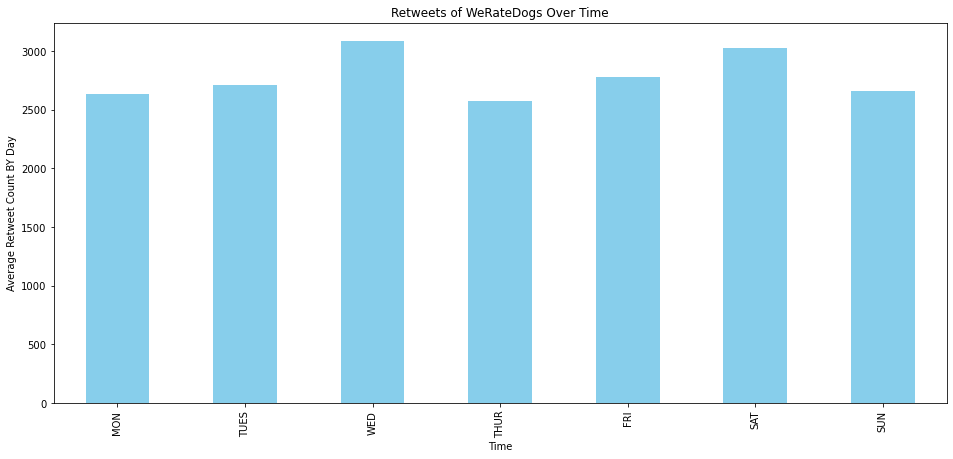

In [484]:
fig, axs = plt.subplots(figsize=(16, 7))
df.groupby(df["timestamp"].dt.dayofweek)["retweet_count"].mean().plot(kind='bar', rot=90, ax=axs, color="skyblue")
plt.xlabel("Time")
plt.xticks([0,1,2,3,4,5,6],["MON", "TUES", "WED", "THUR", "FRI", "SAT", "SUN"])
plt.ylabel("Average Retweet Count BY Day")
plt.title("Retweets of WeRateDogs Over Time");

In [485]:
df.drop_duplicates('tweet_id', inplace=True)

In [486]:
df.tweet_id.duplicated().value_counts()


False    1992
Name: tweet_id, dtype: int64

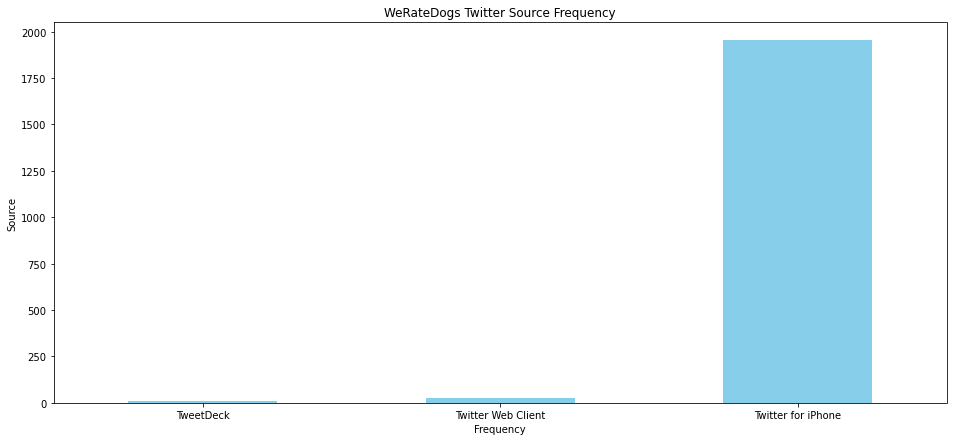

In [487]:
fig, axs = plt.subplots(figsize=(16, 7))
df.groupby('source').count().tweet_id.plot(kind='bar', rot=0, ax=axs, color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Source")
plt.title("WeRateDogs Twitter Source Frequency");